# Exploratory Data Analysis in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

Inspired by the wonderful EDA on Pokemon Data by [Redwan Huq](http://inmachineswetrust.com/posts/exploring-pokemon-dataset/).

![Gotta Catch 'Em All!](images/PokemonIntro.png)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [3]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [4]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

## Explore the Dataset

Exploring any dataset requires a solid understanding of the domain -- it is Pokemon, in our case.    
We understand the following basics regarding Pokemon, primarily from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon) and [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Generation).    

> **Generation** : There are seven generations of Pokemon as of 2018, with 721 till Generation VI (this dataset).   
> **Type** : Every Pokemon has a *primary* type, and some of them also have a *secondary* type -- dual-type ones.    
> **Legendary** : These Pokemons are rare, powerful, and really hard to catch -- there are 38 upto Generation VI.    

Way more trivia about Pokemon is available online -- but let's come back and retrieve more information from the data.

In [5]:
# Information about the Variables
pkmndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


#### Generations of Pokemon in the Dataset

Number of Generations : 6
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


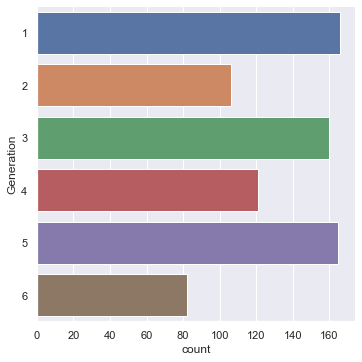

In [6]:
# Generations in the Dataset
print("Number of Generations :", len(pkmndata["Generation"].unique()))

# Pokemons in each Generation
print(pkmndata["Generation"].value_counts())
sb.catplot(y = "Generation", data = pkmndata, kind = "count")

#### Types of Pokemon in the Dataset

![Types of Pokemon](images/PokemonTypes.png)

We understand that there are 18 Sun and Moon types for Pokemons, as shown in the image above, and some have both the Sun and Moon types.   

Number of Primary Types : 18
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


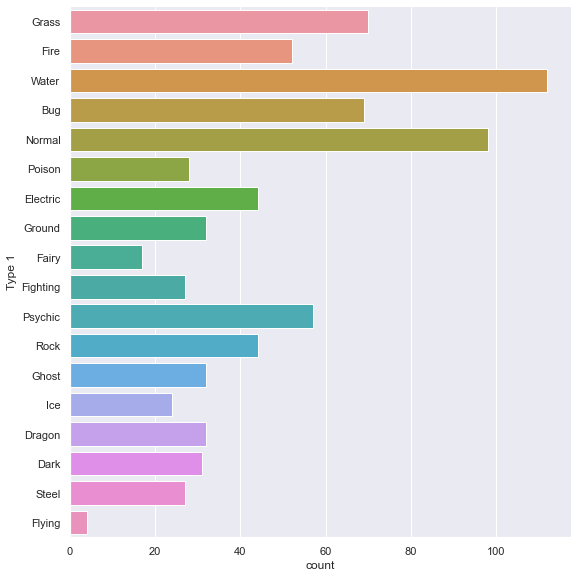

In [7]:
# Primary Types in the Dataset
print("Number of Primary Types :", len(pkmndata["Type 1"].unique()))

# Pokemons of each Primary Type
print(pkmndata["Type 1"].value_counts())
sb.catplot(y = "Type 1", data = pkmndata, kind = "count", height = 8)

Number of Secondary Types : 18
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Ice         14
Rock        14
Water       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


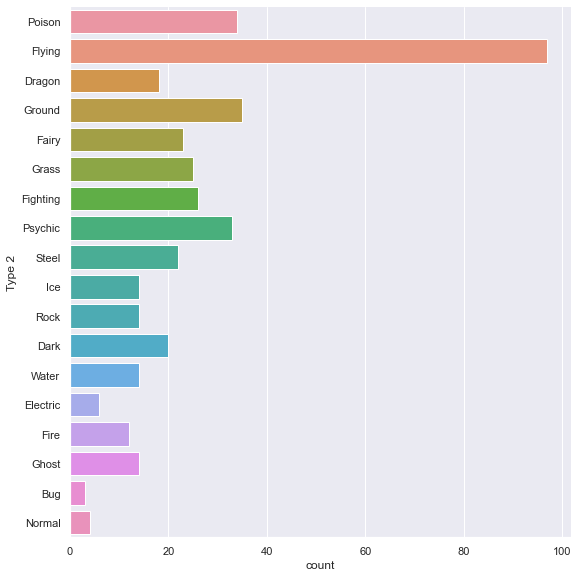

In [8]:
# Secondary Types in the Dataset
print("Number of Secondary Types :", len(pkmndata["Type 2"].dropna().unique()))

# Pokemons of each Secondary Type
print(pkmndata["Type 2"].dropna().value_counts())
sb.catplot(y = "Type 2", data = pkmndata, kind = "count", height = 8)

In [9]:
# Pokemons with a Single Type -- I
singletype_data = pkmndata[pkmndata["Type 2"].isnull()]
print("Pokemons with just Type 1 :", len(singletype_data))
singletype_data.head()

Pokemons with just Type 1 : 386


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [10]:
# Pokemons with Dual Types -- I and II
dualtype_data = pkmndata[pkmndata["Type 2"].isnull() == False]
print("Pokemons with Types 1 and 2 :", len(dualtype_data))
dualtype_data.head()

Pokemons with Types 1 and 2 : 414


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


#### Types of Pokemon over Generations

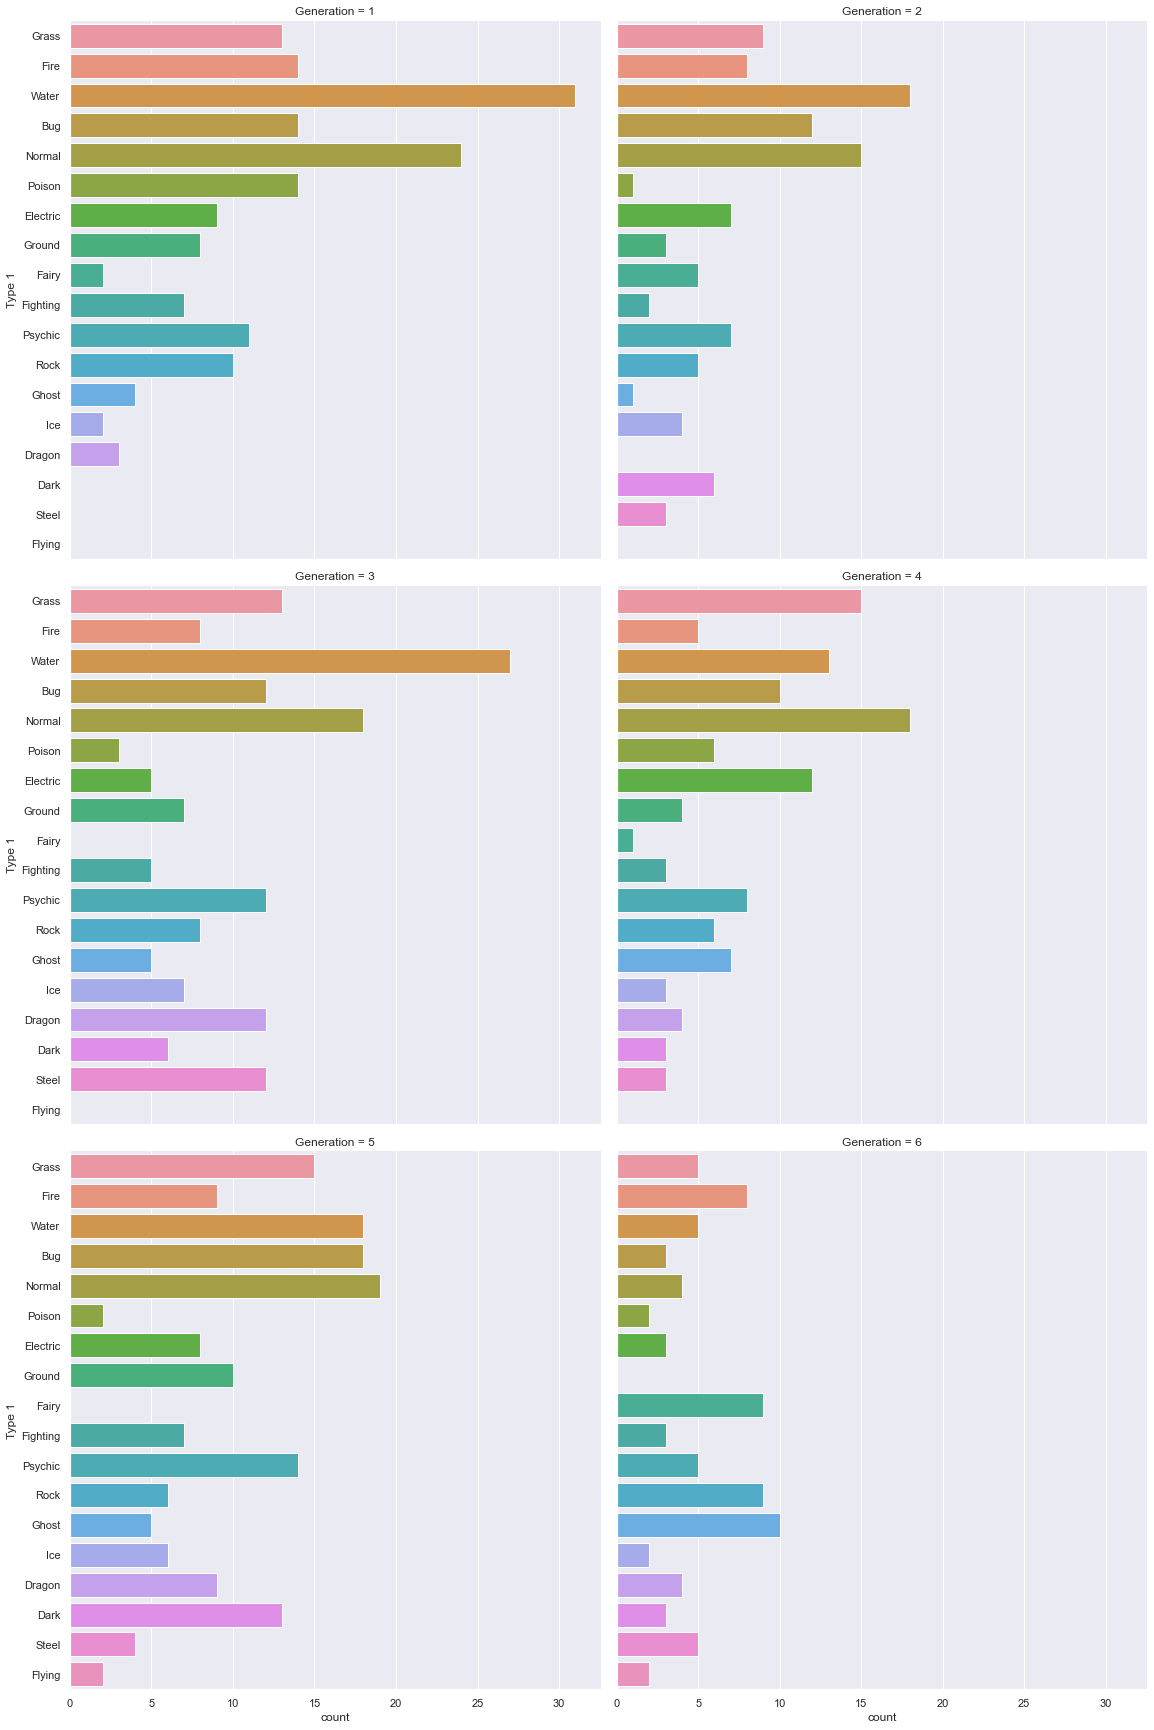

In [11]:
# Primary Type over Generations
sb.catplot(y = 'Type 1', data = pkmndata, col = 'Generation', kind = 'count', col_wrap = 2, height = 8)

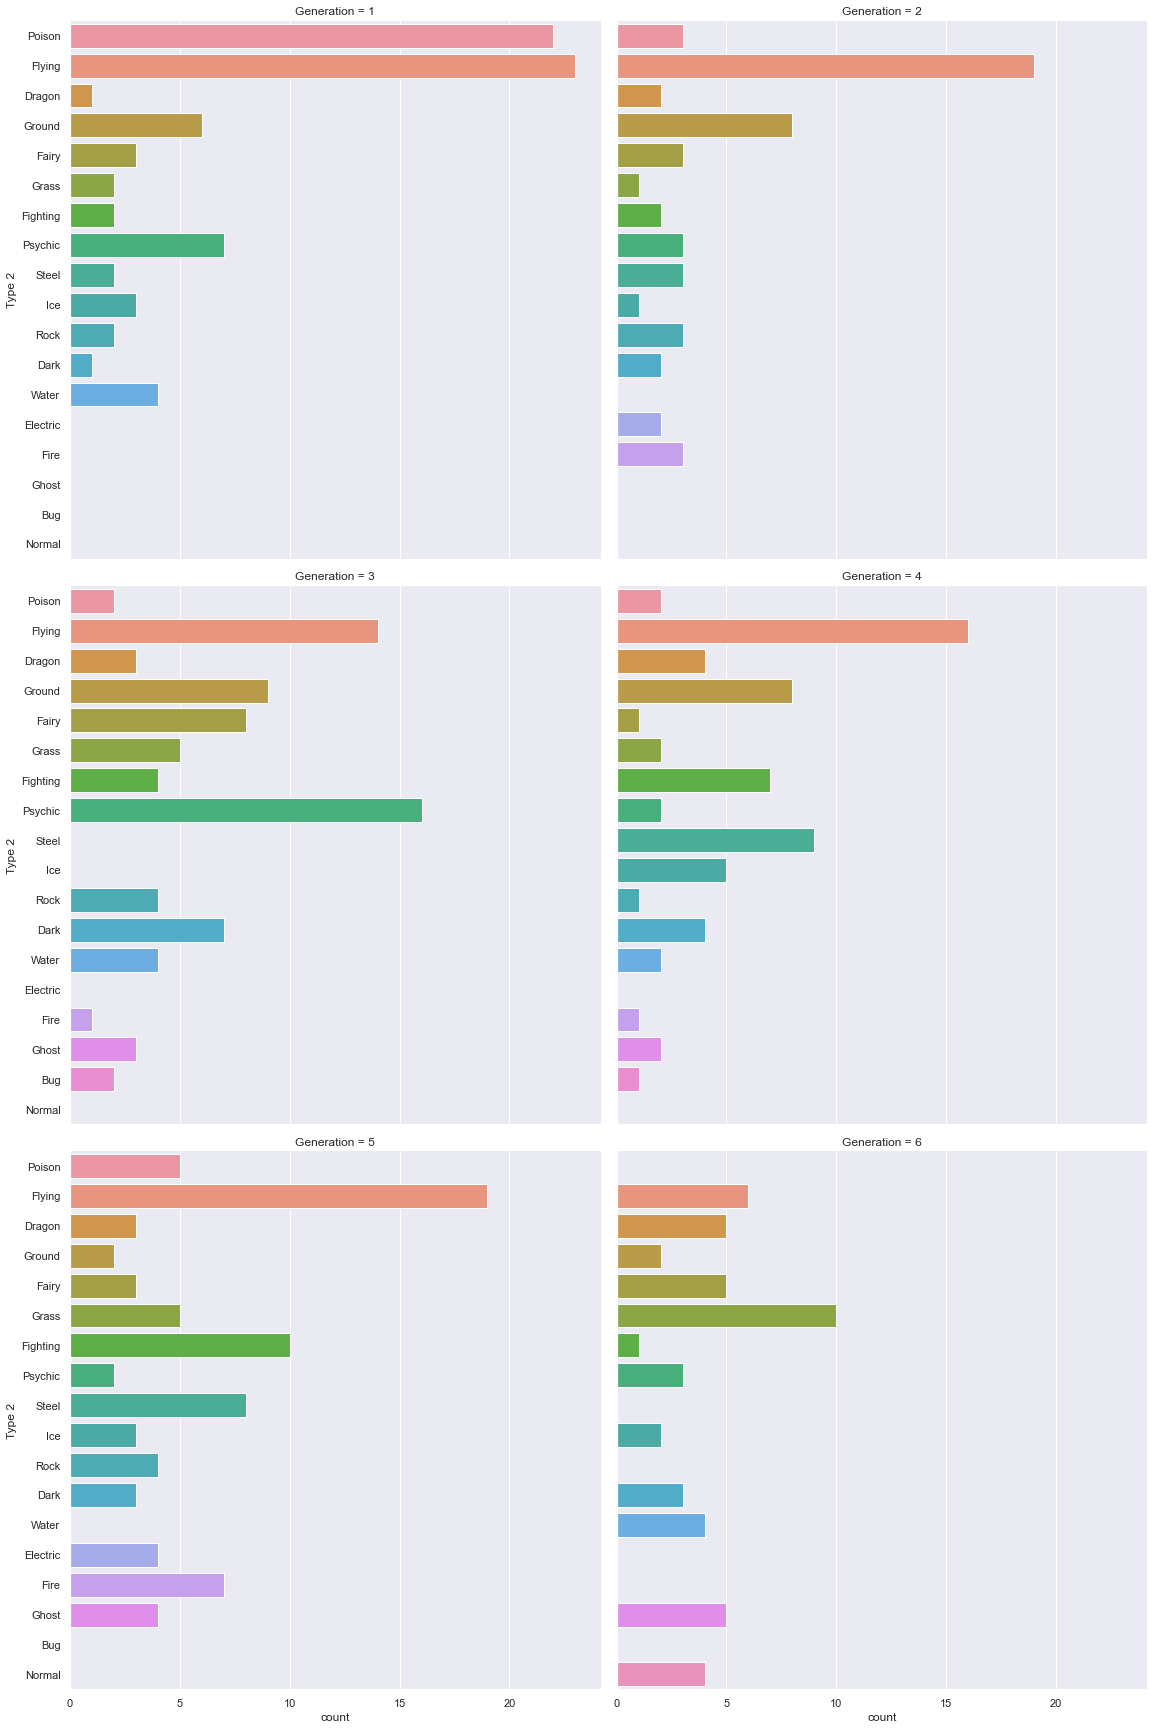

In [12]:
# Secondary Type over Generations
sb.catplot(y = 'Type 2', data = pkmndata, col = 'Generation', kind = 'count', col_wrap = 2, height = 8)

#### Type distribution of Dual-Type Pokemons

Pokemons with Types 1 and 2 : 414


<AxesSubplot:xlabel='Type 2', ylabel='Type 1'>

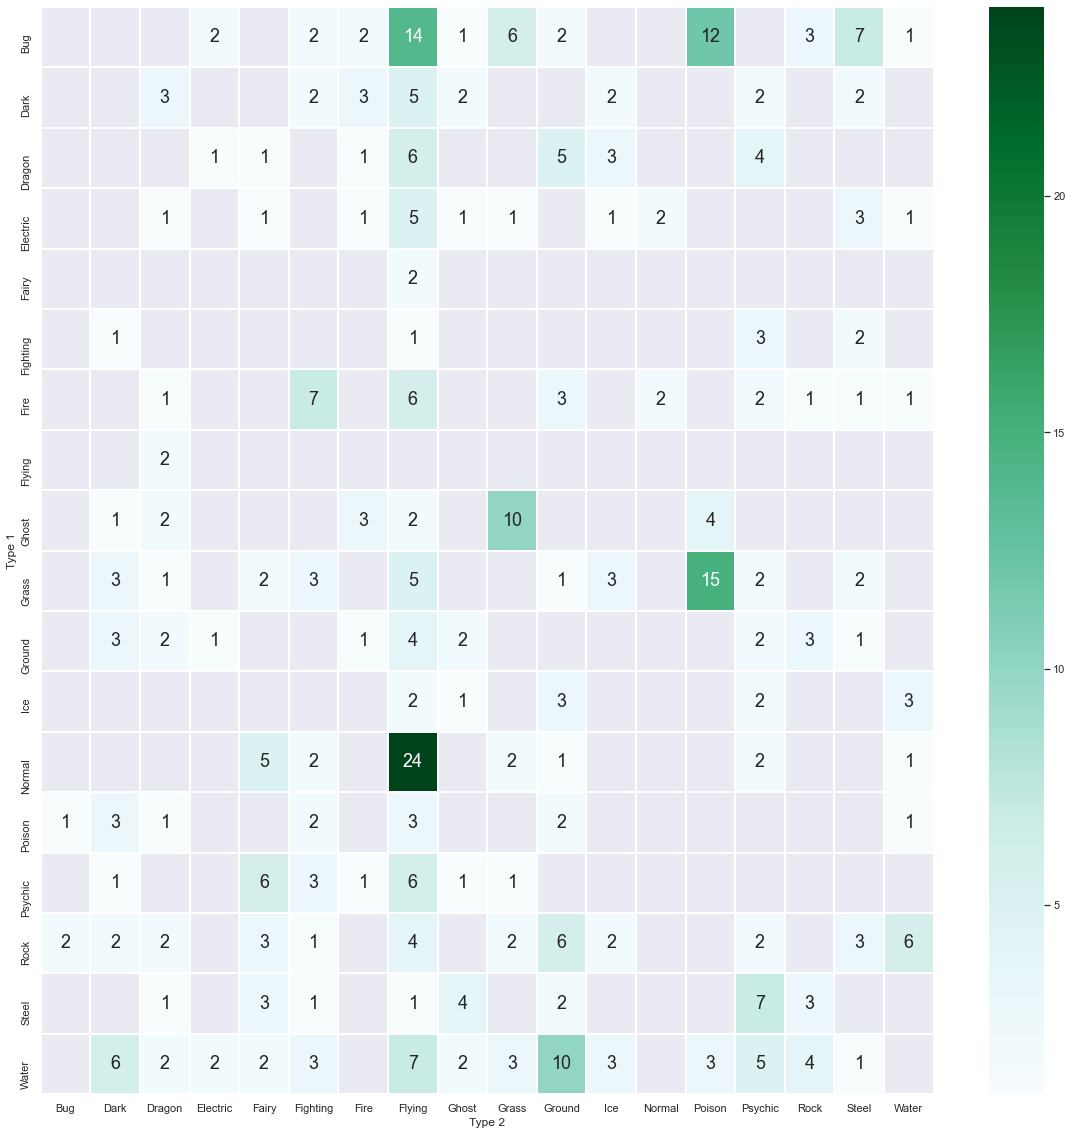

In [13]:
# Pokemons with Dual Types -- I and II
dualtype_data = pkmndata[pkmndata["Type 2"].isnull() == False]
print("Pokemons with Types 1 and 2 :", len(dualtype_data))

# Distribution of the Two Types
f = plt.figure(figsize=(20, 20))
sb.heatmap(dualtype_data.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Type 2', ylabel='Type 1'>

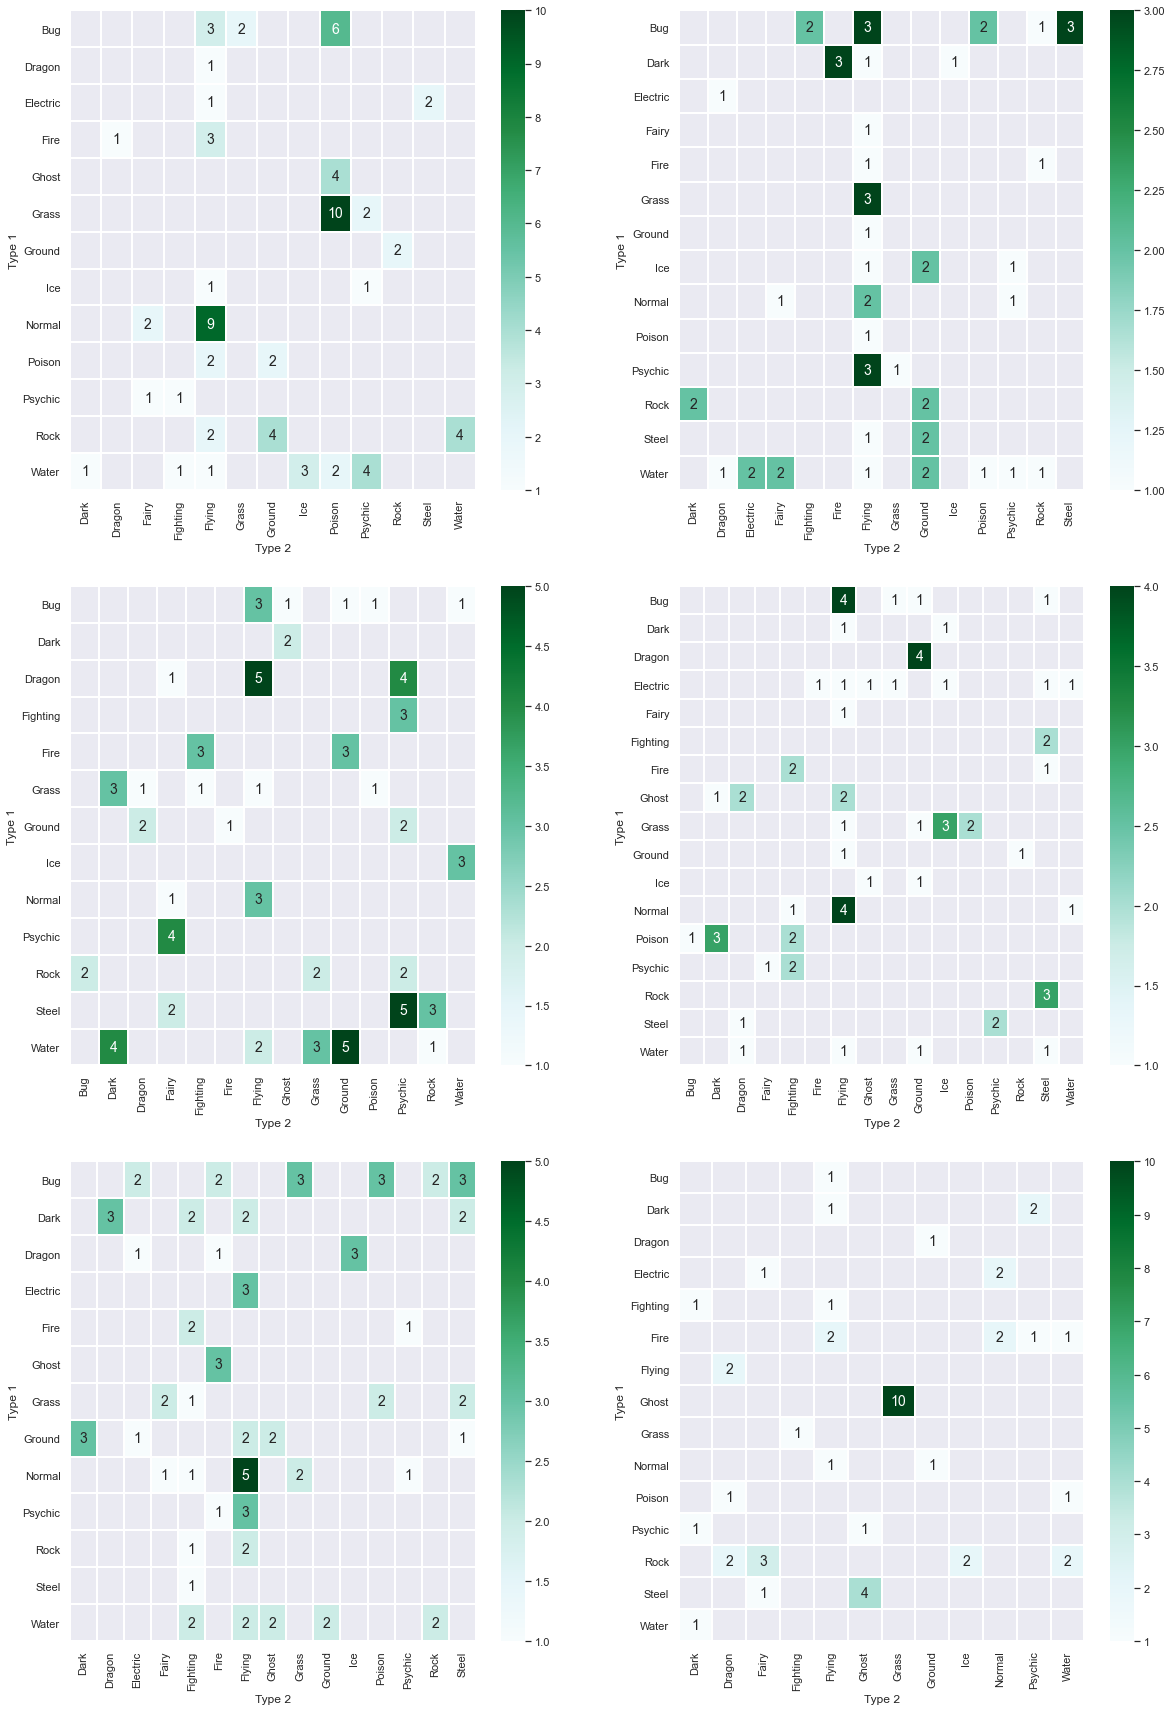

In [14]:
# Distribution of the Two Types over Generations
f, axes = plt.subplots(3, 2, figsize=(20, 30))

dualtype_gen1 = dualtype_data[dualtype_data["Generation"] == 1]
dualtype_gen2 = dualtype_data[dualtype_data["Generation"] == 2]
dualtype_gen3 = dualtype_data[dualtype_data["Generation"] == 3]
dualtype_gen4 = dualtype_data[dualtype_data["Generation"] == 4]
dualtype_gen5 = dualtype_data[dualtype_data["Generation"] == 5]
dualtype_gen6 = dualtype_data[dualtype_data["Generation"] == 6]

sb.heatmap(dualtype_gen1.groupby(['Type 1', 'Type 2']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,0])
sb.heatmap(dualtype_gen2.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,1])
sb.heatmap(dualtype_gen3.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,0])
sb.heatmap(dualtype_gen4.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,1])
sb.heatmap(dualtype_gen5.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2,0])
sb.heatmap(dualtype_gen6.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2,1])

#### Legendary Pokemons

![Legendary Pokemons](images/PokemonLegendary.png)

We understand that there are 65 Legendary Pokemons till Generation 6. Rare, powerful, interesting, and hard to catch. Let's explore them in the dataset.

Number of Legendary Pokemons : 65
3    18
5    15
4    13
6     8
1     6
2     5
Name: Generation, dtype: int64


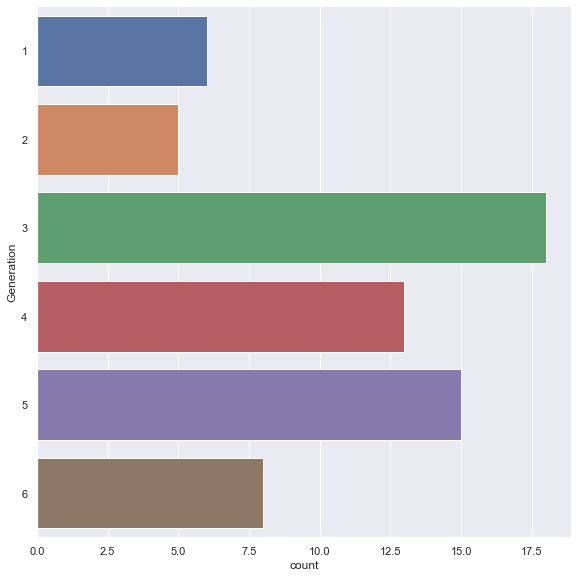

In [15]:
# Legendary Pokemons in the Dataset
legnd_data = pkmndata[pkmndata["Legendary"] == True]
print("Number of Legendary Pokemons :", len(legnd_data))

# Legendary Pokemons in each Generation
print(legnd_data["Generation"].value_counts())
sb.catplot(y = "Generation", data = legnd_data, kind = "count", height = 8)

Number of Legendary Pokemons : 65
Psychic     14
Dragon      12
Fire         5
Water        4
Steel        4
Rock         4
Ground       4
Electric     4
Grass        3
Ice          2
Flying       2
Dark         2
Ghost        2
Normal       2
Fairy        1
Name: Type 1, dtype: int64


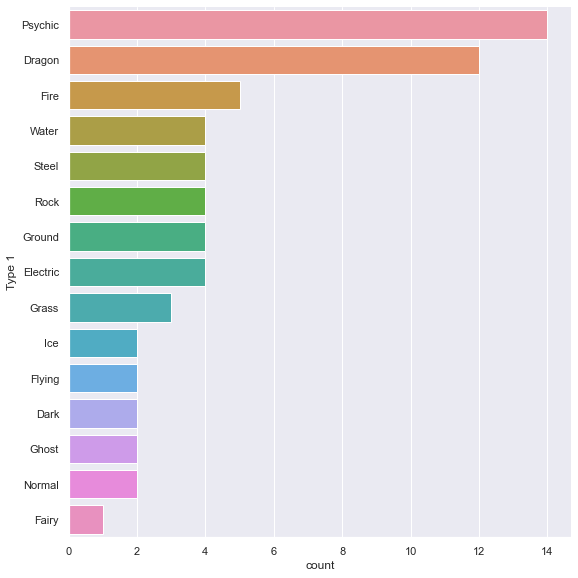

In [16]:
# Legendary Pokemons in the Dataset
legnd_data = pkmndata[pkmndata["Legendary"] == True]
print("Number of Legendary Pokemons :", len(legnd_data))

# Legendary Pokemons in each Primary Type
print(legnd_data["Type 1"].value_counts())
sb.catplot(y = "Type 1", data = legnd_data, kind = "count", 
           order = legnd_data["Type 1"].value_counts().index, height = 8)

Legendary Pokemons with Types 1 and 2 : 40


<AxesSubplot:xlabel='Type 2', ylabel='Type 1'>

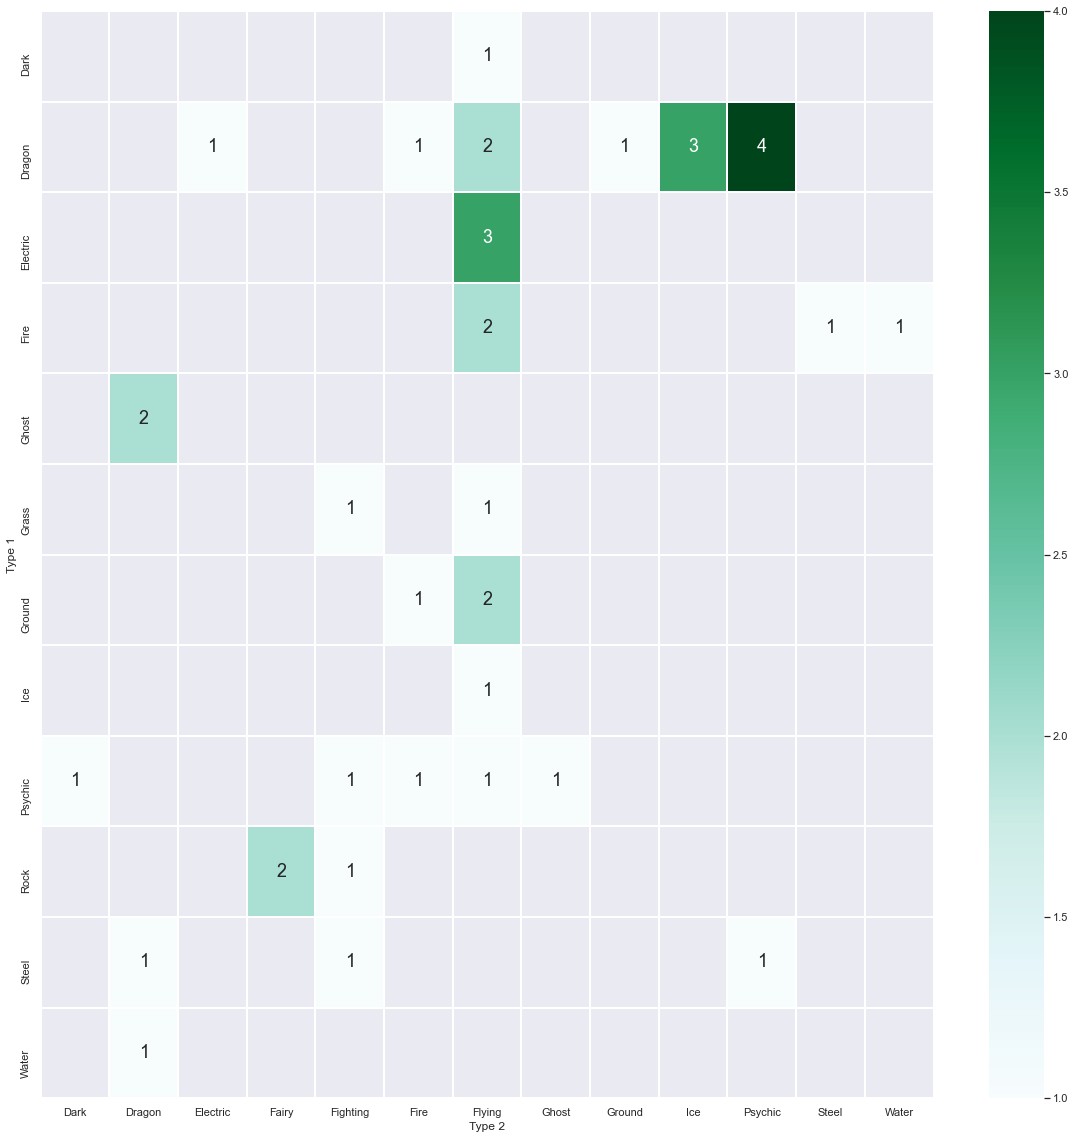

In [17]:
# Legendary Pokemons with two Types -- I and II
dualtype_legnd_data = legnd_data[legnd_data["Type 2"].isnull() == False]
print("Legendary Pokemons with Types 1 and 2 :", len(dualtype_legnd_data))


# Distribution over the Two Types
f = plt.figure(figsize=(20, 20))
sb.heatmap(dualtype_legnd_data.groupby(['Type 1', 'Type 2']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

#### Statistical Summary of Pokemon Points

In [18]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00,800.00,800.00,800.00,800.00,800.00
mean,69.26,79.00,73.84,72.82,71.90,68.28
std,25.53,32.46,31.18,32.72,27.83,29.06
min,1.00,5.00,5.00,10.00,20.00,5.00
25%,50.00,55.00,50.00,49.75,50.00,45.00
50%,65.00,75.00,70.00,65.00,70.00,65.00
75%,80.00,100.00,90.00,95.00,90.00,90.00
max,255.00,190.00,230.00,194.00,230.00,180.00


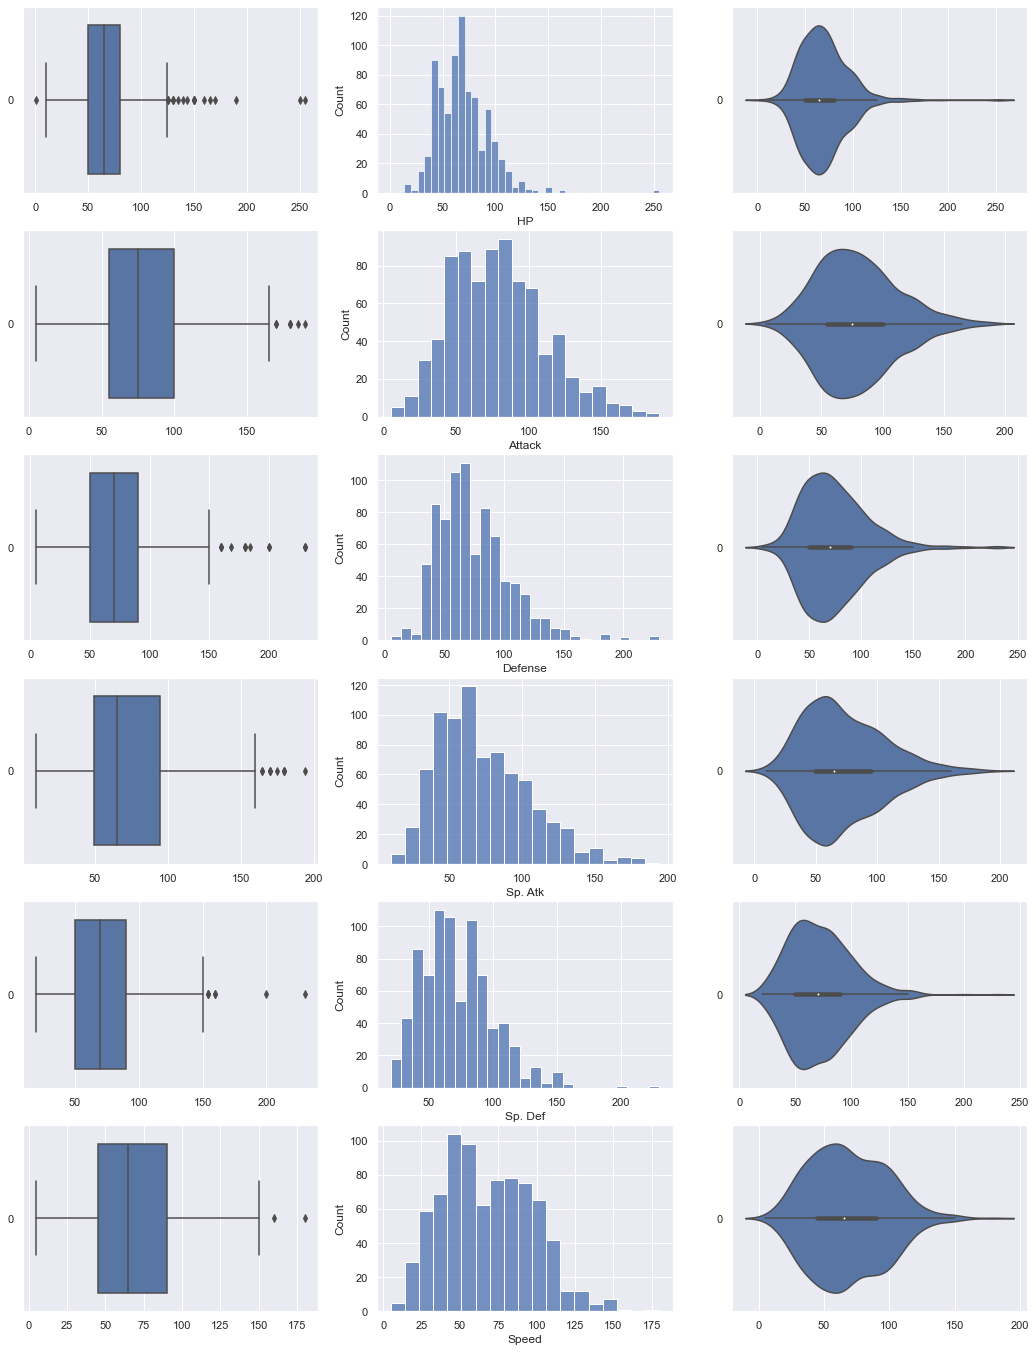

In [19]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.175952  0.381240  0.015227  0.473018  0.259133  1.000000


<AxesSubplot:>

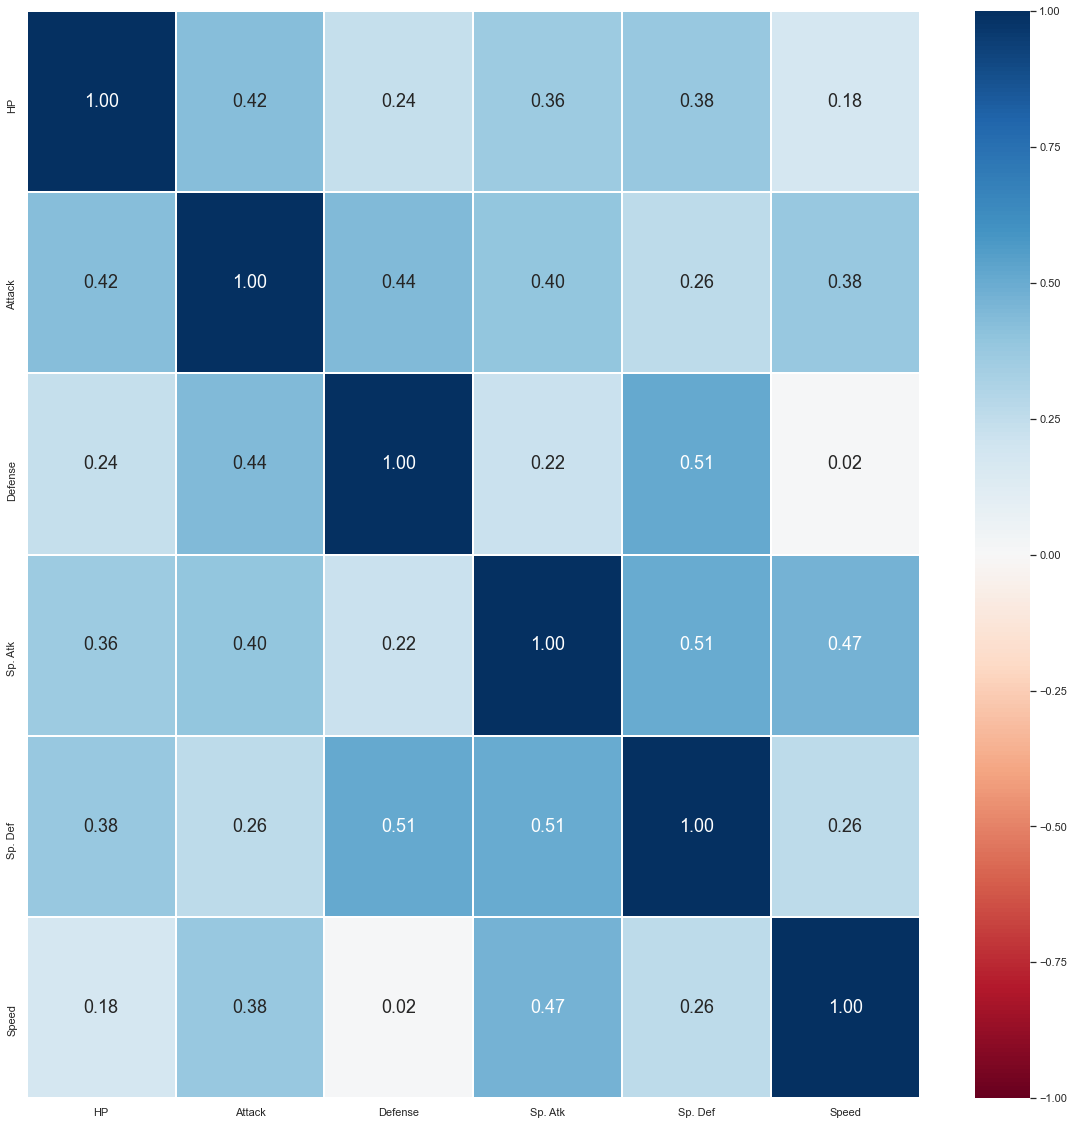

In [20]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

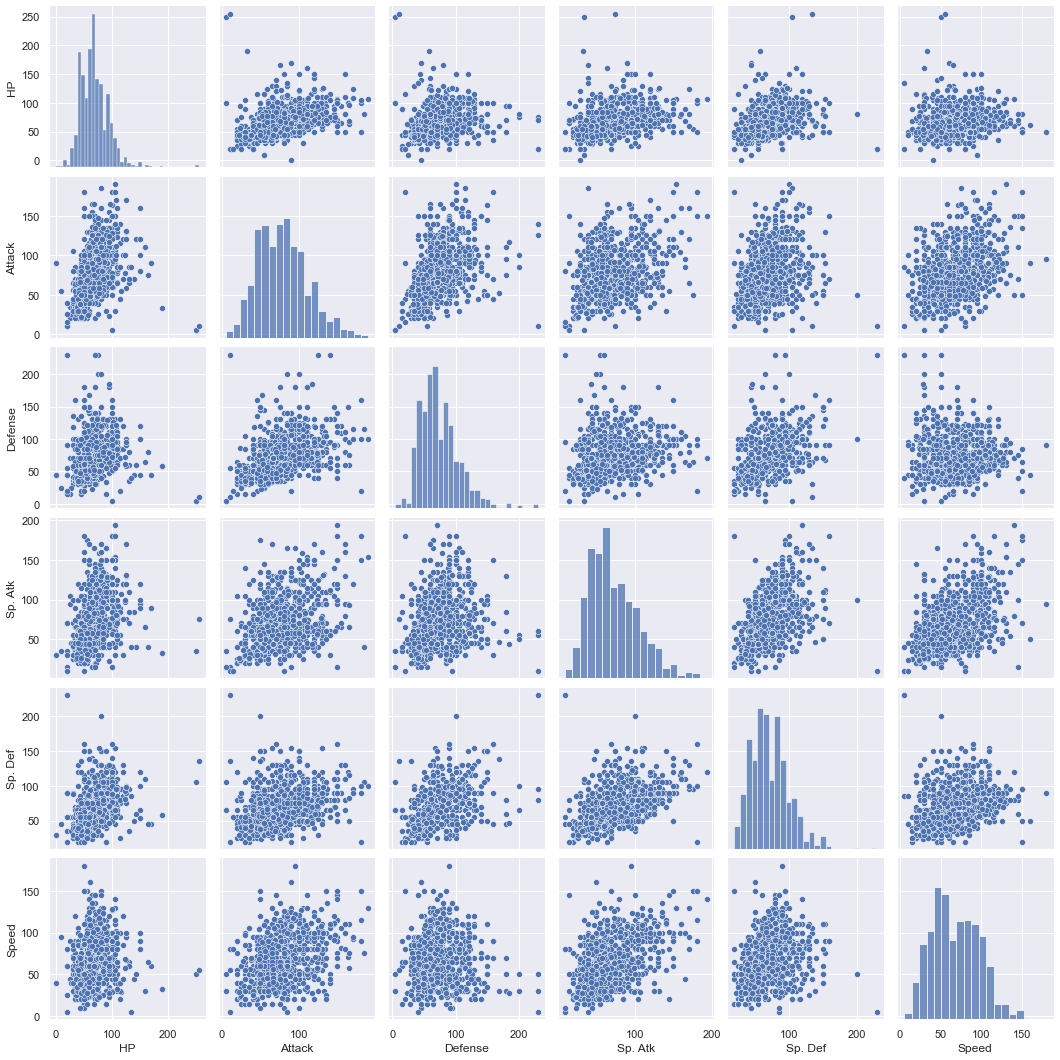

In [21]:
# Draw pairs of variables against one another
sb.pairplot(data = numeric_data)

#### Unique Names and IDs of Pokemons

In [22]:
# Names of Pokemon in the Dataset
print("Unique Names of Pokemon :", len(pkmndata["Name"].unique()))

Unique Names of Pokemon : 800


In [23]:
# IDs of Pokemon in the Dataset
print("Unique IDs of Pokemon :", len(pkmndata["#"].unique()))

Unique IDs of Pokemon : 721


In [24]:
# Pokemons with Duplicate IDs
dupid_data = pkmndata[pkmndata.duplicated("#", keep = False)]
dupid_data.sort_values(by = "Name").head(n = 10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
510,460,Abomasnow,Grass,Ice,494,90,92,75,92,85,60,4,False
511,460,AbomasnowMega Abomasnow,Grass,Ice,594,90,132,105,132,105,30,4,False
392,359,Absol,Dark,NaN,465,65,130,60,75,60,75,3,False
393,359,AbsolMega Absol,Dark,NaN,565,65,150,60,115,60,115,3,False
750,681,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False
751,681,AegislashShield Forme,Steel,Ghost,520,60,50,150,50,150,60,6,False
153,142,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1,False
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
332,306,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


In [25]:
# Pokemons with Duplicate IDs
print("Pokemons with Duplicate IDs :", len(dupid_data))
dupids = dupid_data["#"].unique()
print("Unique Pokemons with DupIDs :", len(dupids))
print()

# Group Pokemons with same ID
print("# \t Count \t List of Pokemons with Duplicate IDs")
print()
for dupid in dupids:
    dupid_list = list(dupid_data[dupid_data["#"] == dupid]["Name"])
    print(dupid, "\t", len(dupid_list), "\t", dupid_list)

Pokemons with Duplicate IDs : 144
Unique Pokemons with DupIDs : 65

# 	 Count 	 List of Pokemons with Duplicate IDs

3 	 2 	 ['Venusaur', 'VenusaurMega Venusaur']
6 	 3 	 ['Charizard', 'CharizardMega Charizard X', 'CharizardMega Charizard Y']
9 	 2 	 ['Blastoise', 'BlastoiseMega Blastoise']
15 	 2 	 ['Beedrill', 'BeedrillMega Beedrill']
18 	 2 	 ['Pidgeot', 'PidgeotMega Pidgeot']
65 	 2 	 ['Alakazam', 'AlakazamMega Alakazam']
80 	 2 	 ['Slowbro', 'SlowbroMega Slowbro']
94 	 2 	 ['Gengar', 'GengarMega Gengar']
115 	 2 	 ['Kangaskhan', 'KangaskhanMega Kangaskhan']
127 	 2 	 ['Pinsir', 'PinsirMega Pinsir']
130 	 2 	 ['Gyarados', 'GyaradosMega Gyarados']
142 	 2 	 ['Aerodactyl', 'AerodactylMega Aerodactyl']
150 	 3 	 ['Mewtwo', 'MewtwoMega Mewtwo X', 'MewtwoMega Mewtwo Y']
181 	 2 	 ['Ampharos', 'AmpharosMega Ampharos']
208 	 2 	 ['Steelix', 'SteelixMega Steelix']
212 	 2 	 ['Scizor', 'ScizorMega Scizor']
214 	 2 	 ['Heracross', 'HeracrossMega Heracross']
229 	 2 	 ['Houndoom', 'HoundoomMe

---

## Clean the Dataset

Once we are done with the basic exploration of variables, it's time to *clean* and *tidy-up* the dataset.

In [26]:
# Create a copy of the Dataset
pkmndata_clean = pkmndata.copy()

# Rename "#" to "ID" of Pokemon
pkmndata_clean.rename(columns = {'#': 'ID'}, inplace = True)

# Convert all Variable Names to UPPERCASE
pkmndata_clean.columns = pkmndata_clean.columns.str.upper()

# Remove all spaces and dots from Variable Names
pkmndata_clean.columns = pkmndata_clean.columns.str.replace(".","")
pkmndata_clean.columns = pkmndata_clean.columns.str.replace(" ","_")

# Print the Variable Information to check
pkmndata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   NAME        800 non-null    object
 2   TYPE_1      800 non-null    object
 3   TYPE_2      414 non-null    object
 4   TOTAL       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   ATTACK      800 non-null    int64 
 7   DEFENSE     800 non-null    int64 
 8   SP_ATK      800 non-null    int64 
 9   SP_DEF      800 non-null    int64 
 10  SPEED       800 non-null    int64 
 11  GENERATION  800 non-null    int64 
 12  LEGENDARY   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


<ipython-input-26-b3b8baacb470>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  pkmndata_clean.columns = pkmndata_clean.columns.str.replace(".","")


#### Fix Pokemon Names

We take cue from the Pokedex dataset (https://pokemondb.net/pokedex/all), and perform the following (not in order).   

> Convert `[Name]Mega [Name]` to `[Name]Mega`    
> Convert `[Name]Mega [Name] X` to `[Name]MegaX`    
> Convert `[Name]Mega [Name] Y` to `[Name]MegaY`    
> Convert `[Name][Form] Forme` to `[Name][Form]`    
> Convert `[Name][Cloak] Cloak` to `[Name][Cloak]`    
> Convert `[Name][Rotom] Rotom` to `[Name][Rotom]`    
> Convert `[Name][Size] Size` to `[Name][Size]`    
> Convert `HoopaHoopa [Form]` to `Hoopa[Form]`     

Regular Expression (RegEx) search-and-replace is a lovely tool to accomplish such tasks. We use `re` library in Python.

In [27]:
# Fix the weird Names of Pokemons
import re

# Fix names with extra Extensions
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Forme)',r'\1', x))
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Cloak)',r'\1', x))
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Rotom)',r'\1', x))
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+)(Size)',r'\1', x))
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(Hoopa)(.+)',r'\2', x))

# Fix names with Mega in between
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'(.+Mega)(.+)',r'\1', x))

# Remove Blanks from all the Names
pkmndata_clean["NAME"] = pkmndata_clean["NAME"].apply(lambda x: re.sub(r'\s+','', x))

In [28]:
# Pokemons with Duplicate IDs
dupid_data_clean = pkmndata_clean[pkmndata_clean.duplicated("ID", keep = False)]
print("Pokemons with Duplicate IDs :", len(dupid_data_clean))
dupids_clean = dupid_data_clean["ID"].unique()
print("Unique Pokemons with DupIDs :", len(dupids_clean))
print()

# Group Pokemons with same ID
print("# \t Count \t List of Pokemons with Duplicate IDs")
print()
for dupid_clean in dupids_clean:
    dupid_list_clean = list(dupid_data_clean[dupid_data_clean["ID"] == dupid_clean]["NAME"])
    print(dupid_clean, "\t", len(dupid_list_clean), "\t", dupid_list_clean)

Pokemons with Duplicate IDs : 144
Unique Pokemons with DupIDs : 65

# 	 Count 	 List of Pokemons with Duplicate IDs

3 	 2 	 ['Venusaur', 'VenusaurMega']
6 	 3 	 ['Charizard', 'CharizardMega', 'CharizardMega']
9 	 2 	 ['Blastoise', 'BlastoiseMega']
15 	 2 	 ['Beedrill', 'BeedrillMega']
18 	 2 	 ['Pidgeot', 'PidgeotMega']
65 	 2 	 ['Alakazam', 'AlakazamMega']
80 	 2 	 ['Slowbro', 'SlowbroMega']
94 	 2 	 ['Gengar', 'GengarMega']
115 	 2 	 ['Kangaskhan', 'KangaskhanMega']
127 	 2 	 ['Pinsir', 'PinsirMega']
130 	 2 	 ['Gyarados', 'GyaradosMega']
142 	 2 	 ['Aerodactyl', 'AerodactylMega']
150 	 3 	 ['Mewtwo', 'MewtwoMega', 'MewtwoMega']
181 	 2 	 ['Ampharos', 'AmpharosMega']
208 	 2 	 ['Steelix', 'SteelixMega']
212 	 2 	 ['Scizor', 'ScizorMega']
214 	 2 	 ['Heracross', 'HeracrossMega']
229 	 2 	 ['Houndoom', 'HoundoomMega']
248 	 2 	 ['Tyranitar', 'TyranitarMega']
254 	 2 	 ['Sceptile', 'SceptileMega']
257 	 2 	 ['Blaziken', 'BlazikenMega']
260 	 2 	 ['Swampert', 'SwampertMega']
282 	 2 	 [

In [29]:
# X,Y labels missing for Charizard (6) and Mewtwo (150)
print(pkmndata_clean[pkmndata_clean["ID"] == 6]["NAME"])
print(pkmndata_clean[pkmndata_clean["ID"] == 150]["NAME"])

6        Charizard
7    CharizardMega
8    CharizardMega
Name: NAME, dtype: object
162        Mewtwo
163    MewtwoMega
164    MewtwoMega
Name: NAME, dtype: object


In [30]:
# Fix the X,Y labels for Charizard and Mewtwo
pkmndata_clean.loc[7,"NAME"] = "CharizardMegaX"
pkmndata_clean.loc[8,"NAME"] = "CharizardMegaY"
pkmndata_clean.loc[163,"NAME"] = "MewtwoMegaX"
pkmndata_clean.loc[164,"NAME"] = "MewtwoMegaY"

In [31]:
# Set NAME as the Index of the DataFrame
pkmndata_clean = pkmndata_clean.set_index('NAME')

# Print the DataFrame to check
pkmndata_clean.sample(n = 10)

,ID,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Aromatisse,683,Fairy,NaN,462,101,72,72,99,89,29,6,False
Finneon,456,Water,NaN,330,49,49,56,49,61,66,4,False
AerodactylMega,142,Rock,Flying,615,80,135,85,70,95,150,1,False
KangaskhanMega,115,Normal,NaN,590,105,125,100,60,100,100,1,False
Scrafty,560,Dark,Fighting,488,65,90,115,45,115,58,5,False
Ambipom,424,Normal,NaN,482,75,100,66,60,66,115,4,False
GiratinaOrigin,487,Ghost,Dragon,680,150,120,100,120,100,90,4,True
Yamask,562,Ghost,NaN,303,38,30,85,55,65,30,5,False
Arcanine,59,Fire,NaN,555,90,110,80,100,80,95,1,False


In [32]:
# Check the Variable Information
pkmndata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Bulbasaur to Volcanion
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   TYPE_1      800 non-null    object
 2   TYPE_2      414 non-null    object
 3   TOTAL       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   ATTACK      800 non-null    int64 
 6   DEFENSE     800 non-null    int64 
 7   SP_ATK      800 non-null    int64 
 8   SP_DEF      800 non-null    int64 
 9   SPEED       800 non-null    int64 
 10  GENERATION  800 non-null    int64 
 11  LEGENDARY   800 non-null    bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 75.8+ KB


#### Tackle the Missing Values

Note that `TYPE_2` has only 414 values, instead of the overall 800. Let's fill-in the missing values with the string `NoType` for clarity about single/dual types.     


Missing values are generally represented as `NaN` in numeric arrays, `None` or `NaN` in object arrays, `NaT` in datetime. In certain cases, the missing values may mean the data is not available or not required (as in here). But it may also be errors from data acquisition or data processing. We should check for that.

In [33]:
# Check missing values in data
pkmndata_clean.isnull().sum()

ID              0
TYPE_1          0
TYPE_2        386
TOTAL           0
HP              0
ATTACK          0
DEFENSE         0
SP_ATK          0
SP_DEF          0
SPEED           0
GENERATION      0
LEGENDARY       0
dtype: int64

In [34]:
# Fill missing values in data
pkmndata_clean["TYPE_2"].fillna(value = "NoType", inplace = True)

In [35]:
# Check the Clean Dataset
pkmndata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Bulbasaur to Volcanion
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   TYPE_1      800 non-null    object
 2   TYPE_2      800 non-null    object
 3   TOTAL       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   ATTACK      800 non-null    int64 
 6   DEFENSE     800 non-null    int64 
 7   SP_ATK      800 non-null    int64 
 8   SP_DEF      800 non-null    int64 
 9   SPEED       800 non-null    int64 
 10  GENERATION  800 non-null    int64 
 11  LEGENDARY   800 non-null    bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 75.8+ KB


In [36]:
# Check the Variable Information
print(pkmndata_clean["TYPE_2"].dropna().value_counts())

NoType      386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Ghost        14
Water        14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: TYPE_2, dtype: int64


---

## Pokemons worth Exploring

![My Favorites](images/PokemonMyFabs.png)

Of course, we all have our favourite Pokemons -- mine are Pikachu, Jigglypuff, Togepi, Bulbasaur and Snorlax -- as you can tell from the image above.    

In [37]:
# My Favorites (entirely based on cuteness index, and not on their power)
pkmndata_clean.loc[["Pikachu", "Jigglypuff", "Togepi", "Bulbasaur", "Snorlax"]]

,ID,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Pikachu,25,Electric,NoType,320,35,55,40,50,50,90,1,False
Jigglypuff,39,Normal,Fairy,270,115,45,20,45,25,20,1,False
Togepi,175,Fairy,NoType,245,35,20,65,40,65,20,2,False
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Snorlax,143,Normal,NoType,540,160,110,65,65,110,30,1,False


However, there are some other Pokemons worth exploring -- especially the strongest and the weakest Pokemons, may be for each type and generation.

#### Strongest and Weakest Pokemons

In [38]:
# Strongest Pokemons -- the Top 10
pkmndata_clean.sort_values('TOTAL', ascending=False).head(10)

,ID,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
RayquazaMega,384,Dragon,Flying,780,105,180,100,180,100,115,3,True
MewtwoMegaY,150,Psychic,NoType,780,106,150,70,194,120,140,1,True
MewtwoMegaX,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
KyogrePrimalKyogre,382,Water,NoType,770,100,150,90,180,160,90,3,True
GroudonPrimalGroudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,493,Normal,NoType,720,120,120,120,120,120,120,4,True
KyuremWhiteKyurem,646,Dragon,Ice,700,125,120,90,170,100,95,5,True
KyuremBlackKyurem,646,Dragon,Ice,700,125,170,100,120,90,95,5,True
SalamenceMega,373,Dragon,Flying,700,95,145,130,120,90,120,3,False


In [39]:
# Weakest Pokemons -- the Bottom 10
pkmndata_clean.sort_values('TOTAL', ascending=True).head(10)

,ID,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Sunkern,191,Grass,NoType,180,30,30,30,30,30,30,2,False
Azurill,298,Normal,Fairy,190,50,20,40,20,40,20,3,False
Kricketot,401,Bug,NoType,194,37,25,41,25,41,25,4,False
Wurmple,265,Bug,NoType,195,45,45,35,20,30,20,3,False
Weedle,13,Bug,Poison,195,40,35,30,20,20,50,1,False
Caterpie,10,Bug,NoType,195,45,30,35,20,20,45,1,False
Ralts,280,Psychic,Fairy,198,28,25,25,45,35,40,3,False
Scatterbug,664,Bug,NoType,200,38,35,40,27,25,35,6,False
Magikarp,129,Water,NoType,200,20,10,55,15,20,80,1,False


#### Strongest and Weakest Pokemons -- Legendary and Non-Legendary

In [40]:
# Strongest Legendary Pokemons -- the Top 10
pkmndata_clean[pkmndata_clean["LEGENDARY"] == True].sort_values('TOTAL', ascending=False).head(10)

,ID,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
MewtwoMegaX,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
MewtwoMegaY,150,Psychic,NoType,780,106,150,70,194,120,140,1,True
RayquazaMega,384,Dragon,Flying,780,105,180,100,180,100,115,3,True
KyogrePrimalKyogre,382,Water,NoType,770,100,150,90,180,160,90,3,True
GroudonPrimalGroudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,493,Normal,NoType,720,120,120,120,120,120,120,4,True
KyuremBlackKyurem,646,Dragon,Ice,700,125,170,100,120,90,95,5,True
LatiasMega,380,Dragon,Psychic,700,80,100,120,140,150,110,3,True
KyuremWhiteKyurem,646,Dragon,Ice,700,125,120,90,170,100,95,5,True


In [41]:
# Weakest Legendary Pokemons -- the Bottom 10
pkmndata_clean[pkmndata_clean["LEGENDARY"] == True].sort_values('TOTAL', ascending=True).head(10)

,ID,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Articuno,144,Ice,Flying,580,90,85,100,95,125,85,1,True
Azelf,482,Psychic,NoType,580,75,125,70,125,70,115,4,True
Cobalion,638,Steel,Fighting,580,91,90,129,90,72,108,5,True
Terrakion,639,Rock,Fighting,580,91,129,90,72,90,108,5,True
Virizion,640,Grass,Fighting,580,91,90,72,90,129,108,5,True
TornadusIncarnate,641,Flying,NoType,580,79,115,70,125,80,111,5,True
TornadusTherian,641,Flying,NoType,580,79,100,80,110,90,121,5,True
ThundurusIncarnate,642,Electric,Flying,580,79,115,70,125,80,111,5,True
Mesprit,481,Psychic,NoType,580,80,105,105,105,105,80,4,True


In [42]:
# Strongest Non-Legendary Pokemons -- the Top 10
pkmndata_clean[pkmndata_clean["LEGENDARY"] == False].sort_values('TOTAL', ascending=False).head(10)

,ID,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
MetagrossMega,376,Steel,Psychic,700,80,145,150,105,110,110,3,False
GarchompMega,445,Dragon,Ground,700,108,170,115,120,95,92,4,False
SalamenceMega,373,Dragon,Flying,700,95,145,130,120,90,120,3,False
TyranitarMega,248,Rock,Dark,700,100,164,150,95,120,71,2,False
Slaking,289,Normal,NoType,670,150,160,100,95,65,100,3,False
GyaradosMega,130,Water,Dark,640,95,155,109,70,130,81,1,False
SwampertMega,260,Water,Ground,635,100,150,110,95,110,70,3,False
CharizardMegaY,6,Fire,Flying,634,78,104,78,159,115,100,1,False
CharizardMegaX,6,Fire,Dragon,634,78,130,111,130,85,100,1,False


In [43]:
# Weakest Non-Legendary Pokemons -- the Bottom 10
pkmndata_clean[pkmndata_clean["LEGENDARY"] == False].sort_values('TOTAL', ascending=True).head(10)

,ID,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Sunkern,191,Grass,NoType,180,30,30,30,30,30,30,2,False
Azurill,298,Normal,Fairy,190,50,20,40,20,40,20,3,False
Kricketot,401,Bug,NoType,194,37,25,41,25,41,25,4,False
Weedle,13,Bug,Poison,195,40,35,30,20,20,50,1,False
Caterpie,10,Bug,NoType,195,45,30,35,20,20,45,1,False
Wurmple,265,Bug,NoType,195,45,45,35,20,30,20,3,False
Ralts,280,Psychic,Fairy,198,28,25,25,45,35,40,3,False
Feebas,349,Water,NoType,200,20,15,20,10,55,80,3,False
Scatterbug,664,Bug,NoType,200,38,35,40,27,25,35,6,False


#### Strongest and Weakest Pokemons -- Across Generations

In [44]:
# Strongest Pokemons in each Generation -- the Top 10
generation = 1
pkmndata_clean[pkmndata_clean["GENERATION"] == generation].sort_values('TOTAL', ascending=False).head(10)

,ID,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
MewtwoMegaY,150,Psychic,NoType,780,106,150,70,194,120,140,1,True
MewtwoMegaX,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mewtwo,150,Psychic,NoType,680,106,110,90,154,90,130,1,True
GyaradosMega,130,Water,Dark,640,95,155,109,70,130,81,1,False
CharizardMegaX,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMegaY,6,Fire,Flying,634,78,104,78,159,115,100,1,False
BlastoiseMega,9,Water,NoType,630,79,103,120,135,115,78,1,False
VenusaurMega,3,Grass,Poison,625,80,100,123,122,120,80,1,False
AerodactylMega,142,Rock,Flying,615,80,135,85,70,95,150,1,False


In [45]:
# Weakest Pokemons in each Generation -- the Bottom 10
generation = 1
pkmndata_clean[pkmndata_clean["GENERATION"] == generation].sort_values('TOTAL', ascending=True).head(10)

,ID,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Weedle,13,Bug,Poison,195,40,35,30,20,20,50,1,False
Caterpie,10,Bug,NoType,195,45,30,35,20,20,45,1,False
Magikarp,129,Water,NoType,200,20,10,55,15,20,80,1,False
Kakuna,14,Bug,Poison,205,45,25,50,25,25,35,1,False
Metapod,11,Bug,NoType,205,50,20,55,25,25,30,1,False
Zubat,41,Poison,Flying,245,40,45,35,30,40,55,1,False
Pidgey,16,Normal,Flying,251,40,45,40,35,35,56,1,False
Rattata,19,Normal,NoType,253,30,56,35,25,35,72,1,False
Spearow,21,Normal,Flying,262,40,60,30,31,31,70,1,False


#### Strength of Pokemons over various Types

      TYPE_1    TYPE_2   TOTAL
80    Ground      Fire  770.00
26    Dragon       Ice  686.67
60     Ghost    Dragon  680.00
130    Steel    Dragon  680.00
21    Dragon  Electric  680.00
23    Dragon      Fire  680.00
109  Psychic      Dark  680.00
118     Rock      Dark  650.00
28    Dragon   Psychic  650.00
24    Dragon    Flying  641.67


<AxesSubplot:xlabel='TYPE_2', ylabel='TYPE_1'>

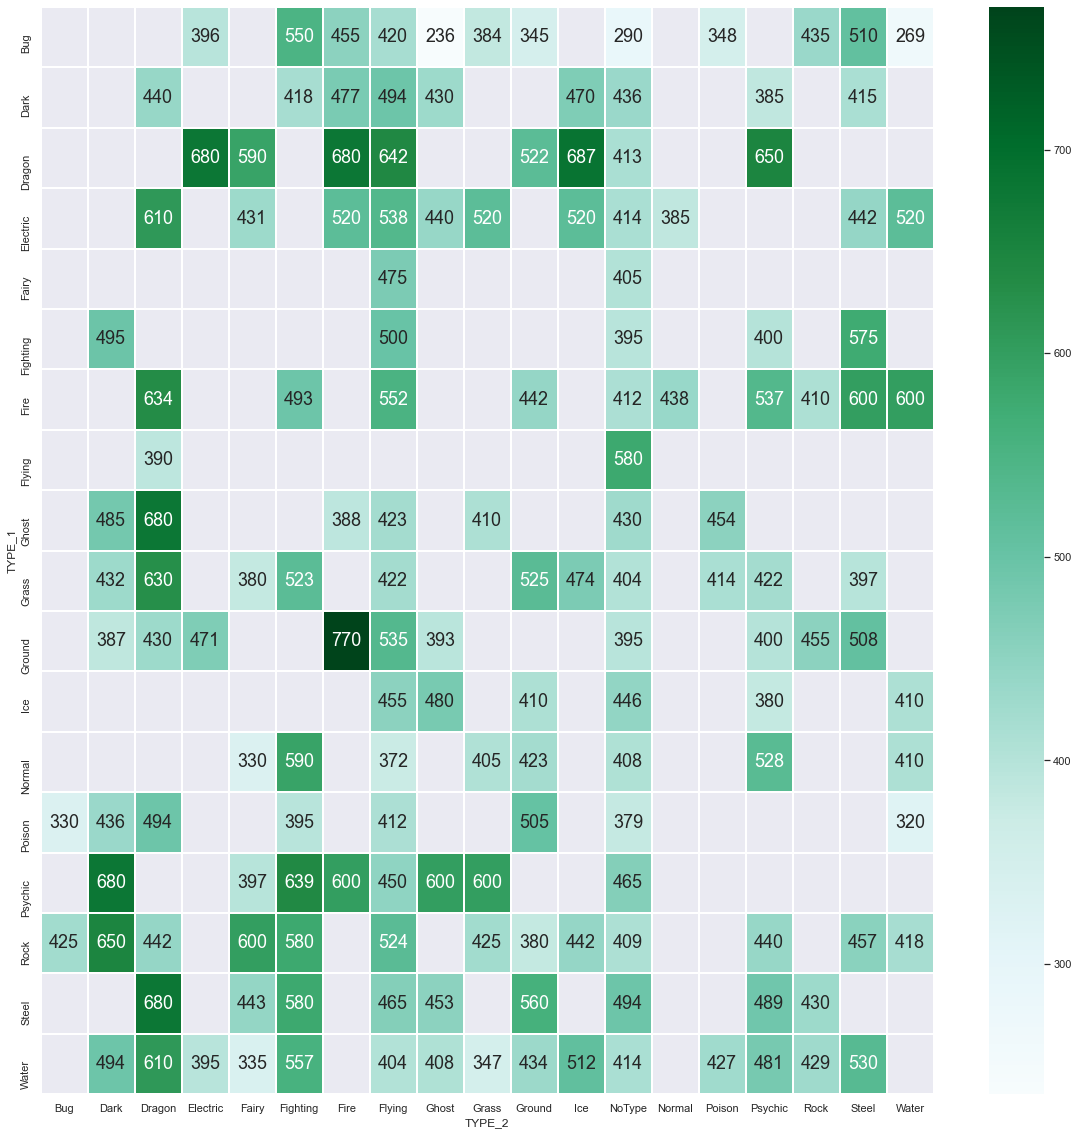

In [46]:
# Compute the Average TOTAL across every pair of TYPEs
total_means = pkmndata_clean.groupby(['TYPE_1', 'TYPE_2']).mean().loc[:, 'TOTAL']

# Strongest Pokemons in each Pair of Types -- the Top 10
print(total_means.reset_index().sort_values('TOTAL', ascending=False).head(10).round(2))

# Heatmap of Average TOTAL across every pair of TYPEs
f = plt.figure(figsize=(20, 20))
sb.heatmap(total_means.unstack(), linewidths = 1,
           annot = True, fmt = ".0f", annot_kws = {"size": 18}, cmap = "BuGn")

#### Strength of Legendary Pokemons over various Types

     TYPE_1    TYPE_2   TOTAL
27  Psychic  Fighting  780.00
20   Ground      Fire  770.00
4    Dragon    Flying  730.00
25   Normal    NoType  695.00
6    Dragon       Ice  686.67
16    Ghost    Dragon  680.00
39    Water    Dragon  680.00
35    Steel    Dragon  680.00
29  Psychic    Flying  680.00
26  Psychic      Dark  680.00


<AxesSubplot:xlabel='TYPE_2', ylabel='TYPE_1'>

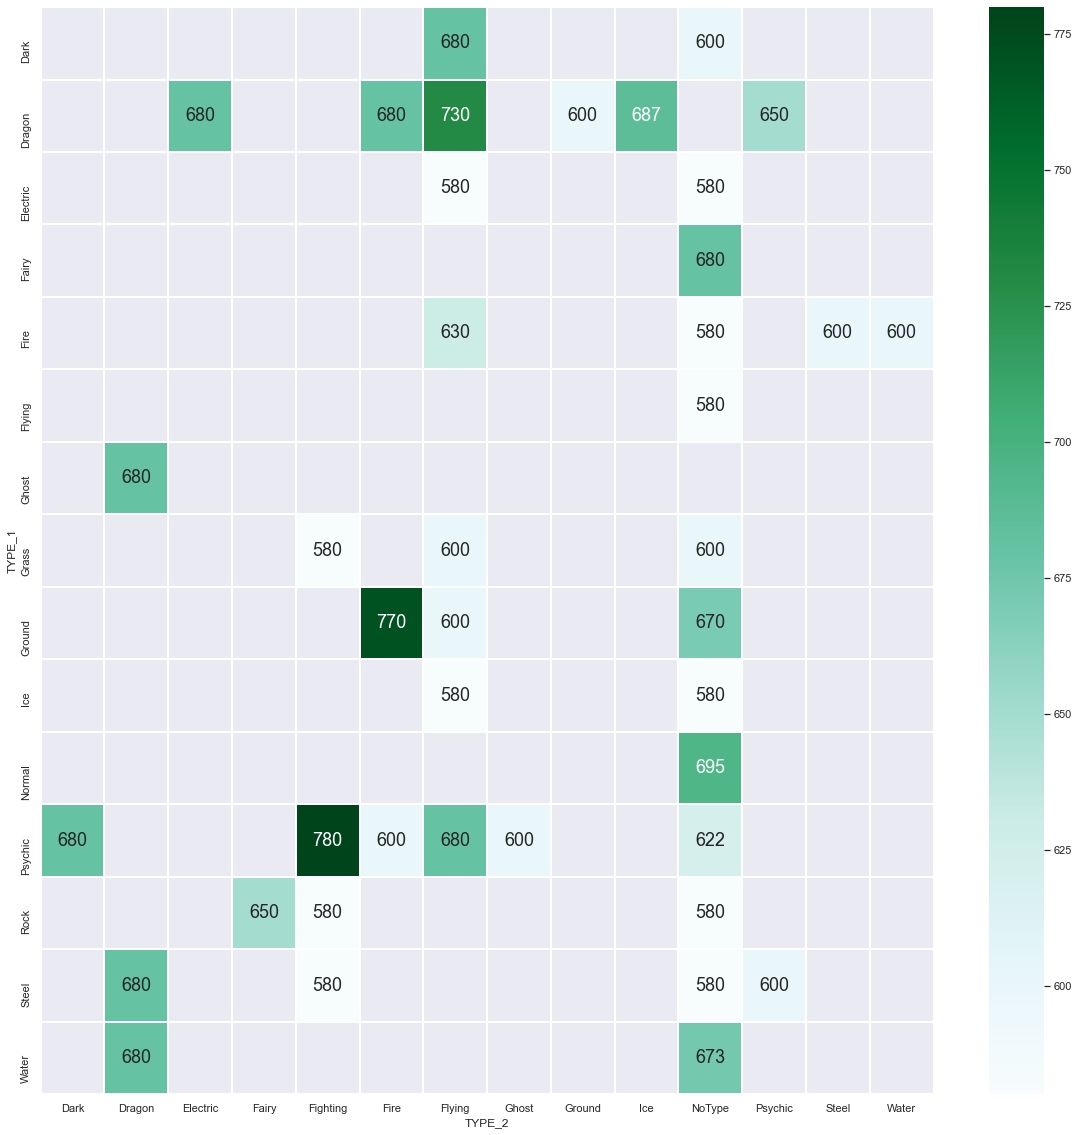

In [47]:
# Compute the Average TOTAL across every pair of TYPEs
total_means = pkmndata_clean[pkmndata_clean["LEGENDARY"] == True].groupby(['TYPE_1', 'TYPE_2']).mean().loc[:, 'TOTAL']

# Strongest Pokemons in each Pair of Types -- the Top 10
print(total_means.reset_index().sort_values('TOTAL', ascending=False).head(10).round(2))

# Heatmap of Average TOTAL across every pair of TYPEs
f = plt.figure(figsize=(20, 20))
sb.heatmap(total_means.unstack(), linewidths = 1,
           annot = True, fmt = ".0f", annot_kws = {"size": 18}, cmap = "BuGn")